In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

#from xgboost import XGBClassifier

#from vecstack import stacking
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r"C:\Users\win10\Desktop\linear regression\20221001_Batch122_DSC7456_Ensemble2\BackOrders.csv",na_values=['$','#','Null'])

In [3]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,Yes,No,No
1,1870557,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.50,0.28,0.0,Yes,No,No,Yes,No,No
2,1475481,258.0,15.0,10.0,10.0,77.0,184.0,46.0,132.0,256.0,...,0.0,0.54,0.70,0.0,No,No,No,Yes,No,No
3,1758220,46.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,...,0.0,0.75,0.90,0.0,Yes,No,No,Yes,No,No
4,1360312,2.0,2.0,0.0,4.0,6.0,10.0,2.0,2.0,5.0,...,0.0,0.97,0.92,0.0,No,No,No,Yes,No,No


In [4]:
df.tail(7)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
61587,1845783,63.0,NaN,0.0,0.0,0.0,0.0,452.0,1715.0,3425.0,...,0.0,-99.00,-99.00,1.0,No,No,No,No,No,Yes
61588,1200539,0.0,2.0,0.0,8.0,8.0,8.0,0.0,1.0,1.0,...,0.0,0.79,0.78,0.0,Yes,No,No,Yes,No,Yes
61589,1221200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61590,1221201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61591,1221209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61592,1220987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61593,1289323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

sku                     0
national_inv            8
lead_time            3408
in_transit_qty          6
forecast_3_month        5
forecast_6_month        5
forecast_9_month        5
sales_1_month           5
sales_3_month           5
sales_6_month           5
sales_9_month           5
min_bank                5
potential_issue         5
pieces_past_due         5
perf_6_month_avg        5
perf_12_month_avg       5
local_bo_qty            5
deck_risk               5
oe_constraint           5
ppap_risk               5
stop_auto_buy           5
rev_stop                5
went_on_backorder       5
dtype: int64

In [6]:
df.shape

(61594, 23)

In [7]:
df.drop(df.tail(5).index,inplace=True)

In [8]:
df.isnull().sum()

sku                     0
national_inv            3
lead_time            3403
in_transit_qty          1
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [9]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,Yes,No,No
1,1870557,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.50,0.28,0.0,Yes,No,No,Yes,No,No
2,1475481,258.0,15.0,10.0,10.0,77.0,184.0,46.0,132.0,256.0,...,0.0,0.54,0.70,0.0,No,No,No,Yes,No,No
3,1758220,46.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,...,0.0,0.75,0.90,0.0,Yes,No,No,Yes,No,No
4,1360312,2.0,2.0,0.0,4.0,6.0,10.0,2.0,2.0,5.0,...,0.0,0.97,0.92,0.0,No,No,No,Yes,No,No


In [10]:
df.dtypes

sku                    int64
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [11]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [12]:
df.drop('sku',axis=1,inplace=True)

In [13]:
df.nunique()

national_inv         2915
lead_time              28
in_transit_qty        908
forecast_3_month     1623
forecast_6_month     2195
forecast_9_month     2664
sales_1_month        1092
sales_3_month        1928
sales_6_month        2679
sales_9_month        3220
min_bank             1098
potential_issue         2
pieces_past_due       190
perf_6_month_avg      102
perf_12_month_avg     102
local_bo_qty          201
deck_risk               2
oe_constraint           2
ppap_risk               2
stop_auto_buy           2
rev_stop                2
went_on_backorder       2
dtype: int64

In [14]:
X=df.drop('went_on_backorder',axis=1)

In [15]:
y=df['went_on_backorder']

In [16]:
cat_cols=['potential_issue','deck_risk', 'oe_constraint','ppap_risk', 'stop_auto_buy', 'rev_stop']

In [17]:
num_cols = X.drop(cat_cols,axis=1)

In [18]:
num_cols.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

In [19]:
num_cols=num_cols.columns

In [20]:
X[cat_cols] = X[cat_cols].astype('category')

In [21]:
X.dtypes

national_inv          float64
lead_time             float64
in_transit_qty        float64
forecast_3_month      float64
forecast_6_month      float64
forecast_9_month      float64
sales_1_month         float64
sales_3_month         float64
sales_6_month         float64
sales_9_month         float64
min_bank              float64
potential_issue      category
pieces_past_due       float64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty          float64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
dtype: object

In [22]:
X.shape

(61589, 21)

In [23]:
y=y.astype('category')

In [24]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=0)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [26]:
numeric_transformer = Pipeline(steps=[('missing_value',SimpleImputer(strategy='mean')),
                     ('scalar1',StandardScaler())])

In [27]:
categorical_transformer = Pipeline(steps=[('missing_value1',SimpleImputer(strategy='most_frequent')),
                                     ('ordinalencode',OrdinalEncoder() )])

In [28]:
preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer, num_cols),('cat',categorical_transformer,cat_cols)])

In [29]:
RF_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [30]:
param_grid1={'classifier__n_estimators':[20,40,60,80,100,120],
              'classifier__max_depth':[3,4,5,6,7]}

grid_search1=GridSearchCV(RF_pipe,param_grid1,cv=10)
grid_search1

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('missing_value',
                                                                                          SimpleImputer()),
                                                                                         ('scalar1',
                                                                                          StandardScaler())]),
                                                                         Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_mont...
                                                                        ('cat',
                                                                         Pipeline(steps=[('missing_value1',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinalencode',
                                                                                          OrdinalEncoder())]),
                                                                         ['potential_issue',
                                                                          'deck_risk',
                                                                          'oe_constraint',
                                                                          'ppap_risk',
                                                                          'stop_auto_buy',
                                                                          'rev_stop'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [3, 4, 5, 6, 7],
                         'classifier__n_estimators': [20, 40, 60, 80, 100,
                                                      120]})

In [34]:
grid_search1.fit(X_train, y_train)
print(grid_search1.best_params_)

{'classifier__max_depth': 7, 'classifier__n_estimators': 100}


In [35]:
grid_search1.cv_results_

{'mean_fit_time': array([0.49649522, 0.79933352, 1.10387461, 1.38425484, 1.62117493,
        1.90565746, 0.50933704, 0.83588164, 1.15617592, 1.48272381,
        1.84675436, 2.07642062, 0.54372151, 0.9343811 , 1.28278313,
        1.66959553, 1.98111744, 2.3462791 , 0.58590443, 1.02493088,
        1.4436528 , 1.81856992, 2.18891644, 2.65417597, 0.62901037,
        1.07648578, 1.52802596, 2.01235952, 2.4250792 , 2.84355385]),
 'std_fit_time': array([0.03195395, 0.05205499, 0.08461703, 0.12015277, 0.11077416,
        0.04492273, 0.01036055, 0.01047989, 0.01209905, 0.01631283,
        0.08231315, 0.02465384, 0.00625197, 0.03696447, 0.01624741,
        0.07696128, 0.01362388, 0.01891392, 0.00780375, 0.03061558,
        0.10531931, 0.03218017, 0.0129755 , 0.07759271, 0.00947007,
        0.00841385, 0.01362367, 0.09211441, 0.05256796, 0.01848173]),
 'mean_score_time': array([0.0372108 , 0.03477983, 0.04517944, 0.05815268, 0.05908473,
        0.0656215 , 0.03124933, 0.04062164, 0.0453069 , 0.05

In [36]:
pd.concat([pd.DataFrame(grid_search1.cv_results_["params"]),pd.DataFrame(grid_search1.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,classifier__max_depth,classifier__n_estimators,Accuracy
0,3,20,0.865351
1,3,40,0.868644
2,3,60,0.866302
3,3,80,0.868552
4,3,100,0.867276
5,3,120,0.868807
6,4,20,0.884417
7,4,40,0.883698
8,4,60,0.882399
9,4,80,0.881217


In [37]:
features=X.columns
importances=grid_search1.best_estimator_['classifier'].feature_importances_

In [38]:
indices=np.argsort(importances)[::-1]
print(indices)

[ 0  3  4  2  5  6  8  9  7 14 10 12 13 11  1 16 19 18 15 20 17]


In [39]:
print(importances)

[3.19872870e-01 1.02123126e-02 6.25139454e-02 1.74272662e-01
 1.23260895e-01 6.16847549e-02 3.97575373e-02 3.54594321e-02
 3.76631892e-02 3.74833002e-02 2.13566840e-02 1.14063536e-02
 1.33654635e-02 1.32919179e-02 3.30212818e-02 2.10495759e-04
 2.44282568e-03 2.51027560e-05 1.28794120e-03 1.34594497e-03
 6.50898896e-05]


In [40]:
import  matplotlib.pyplot as plt

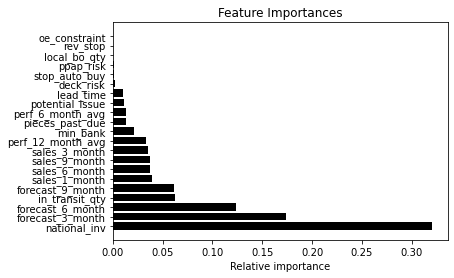

In [42]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()